In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from google.colab import files

In [3]:
uploaded_files = files.upload()
co2_path = "co2-emissions-per-capita.csv"
energy_path = "primary-energy-cons.csv"

df_co2 = pd.read_csv(co2_path)
df_energy = pd.read_csv(energy_path)

df_co2.head(), df_energy.head()


Saving co2-emissions-per-capita.csv to co2-emissions-per-capita.csv
Saving primary-energy-cons.csv to primary-energy-cons.csv


(        Entity  Year  Annual CO₂ emissions (per capita)
 0  Afghanistan  1949                           0.001992
 1  Afghanistan  1950                           0.010837
 2  Afghanistan  1951                           0.011625
 3  Afghanistan  1952                           0.011468
 4  Afghanistan  1953                           0.013123,
         Entity Code  Year  Primary energy consumption (TWh)
 0  Afghanistan  AFG  1980                          6.337187
 1  Afghanistan  AFG  1981                          7.289555
 2  Afghanistan  AFG  1982                          7.889244
 3  Afghanistan  AFG  1983                          9.882159
 4  Afghanistan  AFG  1984                          9.929878)

# **Czesc 1**

In [4]:
co2_pl = df_co2[df_co2["Entity"] == "Poland"]
energy_pl = df_energy[df_energy["Entity"] == "Poland"]

merged_pl = pd.merge(
    co2_pl,
    energy_pl[["Year", "Primary energy consumption (TWh)"]],
    on="Year",
    how="inner"
)

merged_pl.to_csv("poland_energy_co2.csv", index=False)

merged_pl.head()



,Entity,Year,Annual CO₂ emissions (per capita),Primary energy consumption (TWh)
0,Poland,1965,7.893703,776.05330
1,Poland,1966,7.996349,791.17820
2,Poland,1967,8.138128,814.29987
3,Poland,1968,8.597721,876.36676
4,Poland,1969,9.076116,936.06604


# **Czesc 2**

In [5]:
countries = ["European Union (27)","Europe (EI)","Europe","Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg",
    "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia",
    "Slovenia", "Spain", "Sweden", "United States", "China", "India"]

with pd.ExcelWriter("energy_co2_countries.xlsx") as writer:
    for country in countries:
        co2_c = df_co2[df_co2["Entity"] == country]
        energy_c = df_energy[df_energy["Entity"] == country]

        merged = pd.merge(
            co2_c,
            energy_c[["Year", "Primary energy consumption (TWh)"]],
            on="Year",
            how="inner"
        )
        merged.to_excel(writer, sheet_name=country[:28], index=False)

df = pd.read_excel("energy_co2_countries.xlsx", sheet_name="Poland")
df

,Entity,Year,Annual CO₂ emissions (per capita),Primary energy consumption (TWh)
0,Poland,1965,7.893703,776.05330
1,Poland,1966,7.996349,791.17820
2,Poland,1967,8.138128,814.29987
3,Poland,1968,8.597721,876.36676
4,Poland,1969,9.076116,936.06604
5,Poland,1970,9.345997,987.92114
6,Poland,1971,9.547403,1019.14355
7,Poland,1972,9.972351,1074.91880
8,Poland,1973,10.067717,1095.06400
9,Poland,1974,10.291654,1131.25630


# **Czesc 3**

In [6]:
db_countries = ["Poland", "Germany", "Spain"]

conn = sqlite3.connect("energy_co2.db")

conn.execute("""
CREATE TABLE IF NOT EXISTS data (
    country TEXT,
    year INTEGER,
    co2 REAL,
    energy REAL
)
""")

conn.execute("DELETE FROM data")
for country in db_countries:
    co2_c = df_co2[df_co2["Entity"] == country]
    energy_c = df_energy[df_energy["Entity"] == country]

    merged = pd.merge(
        co2_c,
        energy_c[["Year", "Primary energy consumption (TWh)"]],
        on="Year",
        how="inner"
    )

    for _, row in merged.iterrows():
        conn.execute(
            "INSERT INTO data VALUES (?, ?, ?, ?)",
            (
                country,
                int(row["Year"]),
                float(row["Annual CO₂ emissions (per capita)"]),
                float(row["Primary energy consumption (TWh)"]),
            )
        )

conn.commit()
db_data = pd.read_sql_query("SELECT * FROM data", conn)
conn.close()
db_data

,country,year,co2,energy
0,Poland,1965,7.893703,776.05330
1,Poland,1966,7.996349,791.17820
2,Poland,1967,8.138128,814.29987
3,Poland,1968,8.597721,876.36676
4,Poland,1969,9.076116,936.06604
...,...,...,...,...
172,Spain,2019,5.282922,1583.87110
173,Spain,2020,4.443056,1422.96000
174,Spain,2021,4.798705,1531.89940
175,Spain,2022,4.906229,1592.16550


# **Czesc 4**

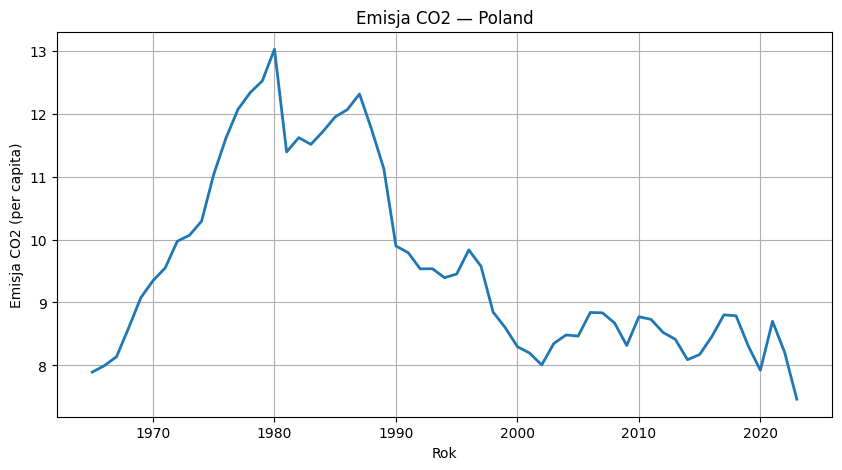

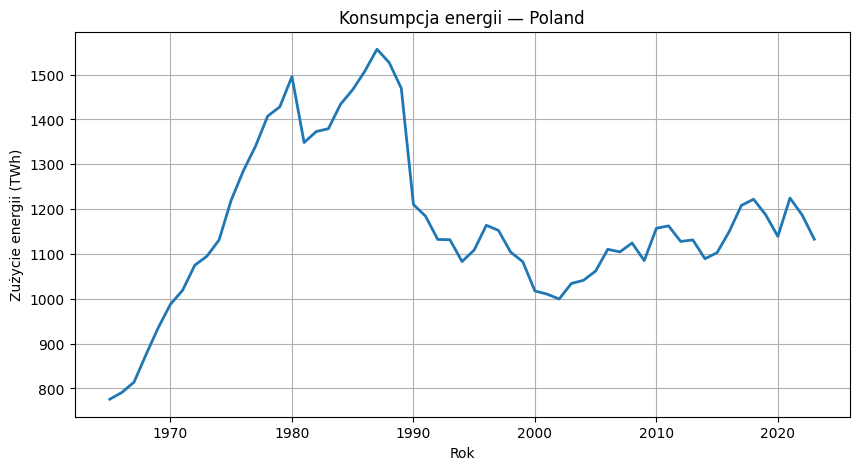

In [7]:
country = "Poland"

conn = sqlite3.connect("energy_co2.db")

df = pd.read_sql_query(
    f"SELECT * FROM data WHERE country = '{country}' ORDER BY year",
    conn
)

conn.close()

# Wykres CO2
plt.figure(figsize=(10,5))
plt.plot(df["year"], df["co2"], linewidth=2)
plt.title(f"Emisja CO2 — {country}")
plt.xlabel("Rok")
plt.ylabel("Emisja CO2 (per capita)")
plt.grid(True)
plt.show()

# Wykres energii
plt.figure(figsize=(10,5))
plt.plot(df["year"], df["energy"], linewidth=2)
plt.title(f"Konsumpcja energii — {country}")
plt.xlabel("Rok")
plt.ylabel("Zużycie energii (TWh)")
plt.grid(True)
plt.show()
